In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Расчет спектра электрона в сферически симметричных потенциалах

Мы рассматриваем частицу в трехмерном пространстве.

Сферически симметричный потенциал - функция, зависящая только от расстояния до центра кординат. Найти спектр электрона (значения возможной энергии) - найти собственные значения Гамильтониана $\hat{H} =- \dfrac{\hbar}{\ {2}{m}} \nabla^2  + V(\textbf{x}).$

Общий вид уравнения Шредингера:
$$i \hbar \frac{\partial \Psi(\textbf{x}, t)}{\partial t} = H \Psi(\textbf{x},t),$$
    $$i \hbar \frac{\partial  \Psi}{\partial t} = -\frac{\hbar^2}{2m}\nabla^2  \Psi + V  \Psi,$$
    где $\nabla^2$ есть Лапласиан.

Time-independent уравнение Шредингера имеет вид:
    $$(\frac{\hbar^2}{2m}\nabla^2 +V)\psi = E \psi$$
Предположим, что решение иммет вид:
$$\psi (r, \theta, \phi) = R(r)Y(\theta, \phi)$$

В случае сферически симметричного потенциала функция, зависящая от углов, нас не интересует, поскольку она одна и та же для всех потенциалов.

А вот радиальная часть будет разной для каждого потенциала, и радиальное уравнение в  общем случае:

$$-\frac{\hbar^2}{2m}\frac{d^2 u}{d r^2}+[V+\frac{\hbar^2}{2m}\frac{l(l+1)}{r^2}]u = Eu,$$

где $u(r) = r R(r).$ 

В случае  $l=0$ имеем:
$$-\frac{\hbar^2}{2m}\frac{d^2 u}{d r^2}+Vu = Eu,$$

$$-\frac{\hbar^2}{2m}u''+Vu = Eu.$$

При переходе в атомные единицы $\hbar = 1, m=1:$
$$-\frac{u''}{2}+Vu = Eu,$$

$$u'' +(-2V)u = (-2E)u,$$

$$(\frac{d^2}{d r^2}-2V)u = (-2E)u$$

Последнее уравнение в явном виде намекает на поиск собственных значений для $(\frac{d^2}{d r^2}-2V)$. Для этого нужно приблизить  непрерыное выражение дискретным. Поскольку типично волновая функция экспоненциально затухает, можно считать, что $u(r) = 0$ при $r \geq L$ для некоторого достаточно большого $L$. Таким образом мы получаем задачу на собственные значения с граничными условиями $u(0) = 0$ (т.к. $u(r) = r R(r)$) и $u(L) = 0$. 
* зададим шаг $h = L N^{-1},$ где $N$ - натуральное (разбиваем отрезок $[0,L]$ на N частей, h - шаг), $r_n = nh$ узлы сетки


* вторая производная задается следующим отношением: $\displaystyle{{u_n''} = \frac{u_{n+1}-2u_n +u_{n-1}}{h^2}}$ (из ряда Тейлора). Обозначим 
$$u(r_n) = u_n$$
$$u''(r_n) = u''_n$$
Тогда $(u''(r))_n \to u_n''(r):$


$$\displaystyle{u_n'' = -\frac{1}{h^2} \begin{bmatrix}
-2 & 1 &0&0&0& \cdots & 0 \\
1 & -2 & 1& 0&0&\cdots & 0 \\  
0&1 & -2 & 1& 0&\cdots & 0 \\  
\vdots & \vdots &\vdots & \vdots & \ddots & -2& 1  \\
0 & 0&0 &0& \cdots &1 & -2
\end{bmatrix}
\begin{bmatrix}
u_1
\\
u_2
\\
u_3
\\
\vdots
\\
u_n
\end{bmatrix}}$$ Заметим, что полученная матрица имеет трехдиагональный вид.


* теперь нужно приблизить $(-2Vu)(r_n)$: 
$$(-2Vu)(r_n) = \begin{bmatrix}
-2V(r_1) & 0 &0&0&0& \cdots & 0 \\
0 & -2V(r_2) & 0& 0&0&\cdots & 0 \\  
0&0 & -2V(r_3) & 0& 0&\cdots & 0 \\  
\vdots & \vdots &\vdots & \vdots & \ddots & \vdots& \vdots  \\
0 & 0&0 &0& \cdots &0 & -2V(r_{n-1})
\end{bmatrix}
\begin{bmatrix}
u_1
\\
u_2
\\
u_3
\\
\vdots
\\
u_n
\end{bmatrix}$$

Можно проверить, что $\displaystyle{||u_n''-u''|| \sim O(h^2)}.$

Теперь наша задача в явном виде найти собственные значения для суммы представленных матриц.


### Изотропный осциллятор

Потенциал задается:
$$V(r) = \frac{1}{2}m \omega^2 r^2$$
Заметим, что при $l=0$ имеем дело с обычным осциллятором.

Для нахождения спектра известно следующее выражение:
$$E = \hbar \omega (2n+l+\frac{3}{2}), ~ n=0,~1,~2,...,$$
которое, однако, сложно получить. 


Реализуем описанный численный метод и сравним с аналитическим решением.

Перейдем в атомную систему единиц, тогда $\hbar = 1, m=1,$ и положим $\omega = \sqrt{0.12}$

In [62]:
def harmonic_oscillator(l):
    N = 1000 #количество разбиений
    L = 20 #радиус меняется от 0 до 20
    x = np.linspace(0, L, num=N+2)[1:-1] #строим разбиения
    h = x[1]-x[0] #шаг
    omega = np.sqrt(0.12)
    #строим диагональную матрицу из значений потенциала в точках разбиения
    A = np.diag(-omega**2 *x**2 - l*(l+1)/x**2) 
    #матрица Лапласиана
    D = np.zeros((N, N))
    for i in range(len(x)):
        if i==0:
            D[0][0] = 2
            D[0][1] = -1
        elif i==N-1:
            D[N-1][N-1] = 2
            D[N-1][N-2] = -1
        else: 
            D[i][i]=2
            D[i][i-1]=-1
            D[i][i+1]=-1
    D = -1/h**2*D
    #итоговая левая часть
    sys = D + A
    #собсвенные значения
    results =[]
    eigs = -np.linalg.eigh(sys)[0]
    for i in range(6):
        results.append(eigs[-i-1]/2)
    return results

In [63]:
def check_harmonic_oscillator(l):
    n = [0,1,2,3,4,5]
    lamb = np.sqrt(0.12)
    E = []
    for i in n:
        E.append(lamb*(2*i+l+3/2))
    return E

In [64]:
print('Численный метод при l=0')
print(harmonic_oscillator(0))
print('Аналитическое решение при l=0')
print(check_harmonic_oscillator(0))

Численный метод при l=0
[0.51960775713188312, 1.2123981390087086, 1.9051645666390813, 2.5979070387813583, 3.2906255541921858, 3.9833201116287471]
Аналитическое решение при l=0
[0.51961524227066325, 1.2124355652982142, 1.9052558883257651, 2.598076211353316, 3.2908965343808667, 3.9837168574084179]


In [65]:
print('Численный метод при l=1')
print(harmonic_oscillator(1))
print('Аналитическое решение при l=1')
print(check_harmonic_oscillator(1))

Численный метод при l=1
[0.86601592271631, 1.5588071034410182, 2.2515743303648574, 2.9443176022457078, 3.6370369178408293, 4.3297322759065757]
Аналитическое решение при l=1
[0.8660254037844386, 1.5588457268119895, 2.2516660498395407, 2.9444863728670914, 3.6373066958946425, 4.3301270189221936]


In [66]:
print('Численный метод при l=2')
print(harmonic_oscillator(2))
print('Аналитическое решение при l=2')
print(check_harmonic_oscillator(2))

Численный метод при l=2
[1.2124280802075589, 1.9052218841207784, 2.5979917341362606, 3.290737629011232, 3.9834595675030426, 4.6761575483685167]
Аналитическое решение при l=2
[1.2124355652982142, 1.9052558883257651, 2.598076211353316, 3.2908965343808667, 3.9837168574084179, 4.676537180435969]


Построим значения энергии для первых шести энергетических уровней при $l=0.$

In [67]:
def oscill(r,omega):
    return 0.5 * omega**2 * r**2

In [76]:
N = 1000
L = 20

x = np.linspace(0, L, num=N+2)[1:-1]
h = x[1]-x[0]
l = 0
omega = np.sqrt(0.12)

In [77]:
A = np.diag(oscill(x,omega) + l*(l+1)/x**2)

In [78]:
D = np.zeros((N, N))
for i in range(len(x)):
    if i==0:
        D[0][0] = 2
        D[0][1] = -1
    elif i==N-1:
        D[N-1][N-1] = 2
        D[N-1][N-2] = -1
    else: 
        D[i][i]=2
        D[i][i-1]=-1
        D[i][i+1]=-1
D = -1/h**2*D

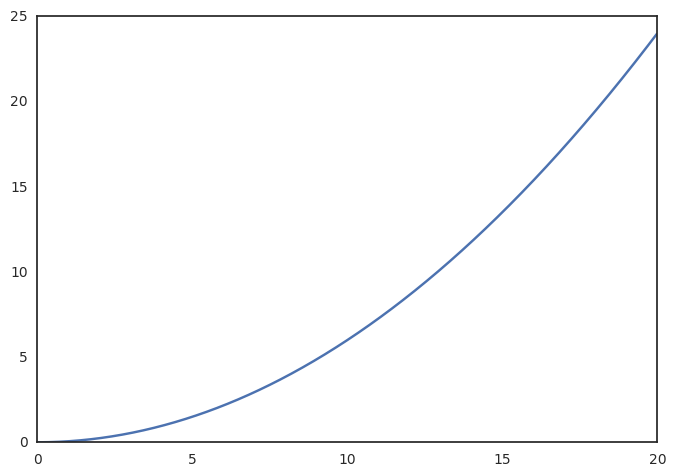

In [79]:
plt.plot(x,oscill(x,omega))

In [80]:
sys = -2*A+D

In [81]:
eigs = -np.linalg.eigvalsh(sys)

In [82]:
import seaborn as sns
sns.set_style('white')

(0, 4.2)

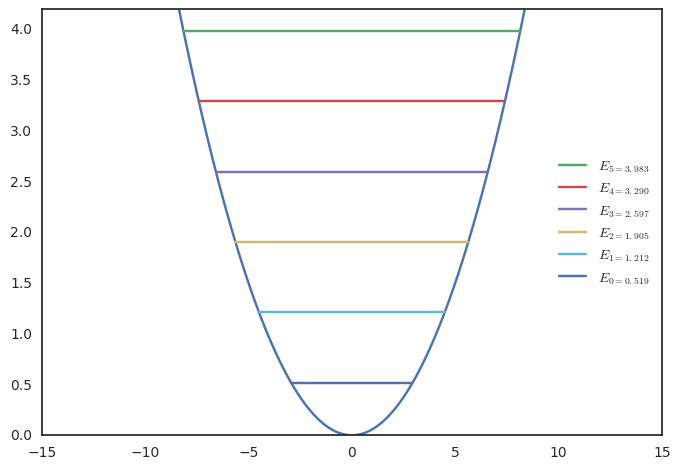

In [83]:
x = np.linspace(-15,15,1000)
xs = np.linspace(-15,15,1000)
y = oscill(x,omega)
plt.plot(x,y)
max_levels = 6
for i in range(max_levels):
    plt.plot(xs[oscill(xs,omega) < eigs[-max_levels+i]/2],np.ones_like(xs[oscill(xs,omega) < eigs[-max_levels+i]/2])*eigs[-max_levels+i]/2,label=r"$E_{"+str(-i+max_levels-1)+"="+str(eigs[-max_levels+i]/2)[:5]+"}$")
    
plt.legend(loc='right')
plt.grid(False)
plt.ylim([0,4.2])
